In [6]:
import tensorflow as tf


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Pandas Concat

In [10]:
# axis = 1  along cols


In [25]:
x_data = np.linspace(0.0,10.0,1000000)

In [33]:
noise = np.random.randn(len(x_data))

In [34]:
y_data = (0.5 * x_data) + 5 + noise


In [35]:
X = pd.DataFrame(data = x_data , columns=['X_DATA'])

In [36]:
Y = pd.DataFrame(data = y_data , columns=['Y'])

In [37]:
df =  pd.concat([X,Y],axis=1)

In [38]:
df.head()

,X_DATA,Y
0,0.00000,4.625407
1,0.00001,4.286220
2,0.00002,4.103637
3,0.00003,3.895393
4,0.00004,5.150866


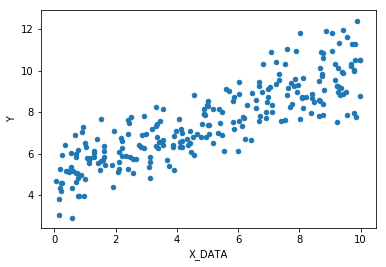

In [39]:
# 300 random values
df.sample(n = 250).plot(kind = 'scatter' , x='X_DATA', y='Y')

In [40]:
batch_size = 5

In [48]:
np.random.randn(2)

array([-1.5280659 , -1.45580863])

In [47]:
np.random.random(2)

array([0.19306153, 0.96540924])

In [49]:
#Slope
m = tf.Variable(1.52)
b = tf.Variable(1.45)

In [50]:
xph = tf.placeholder(tf.float32 , [batch_size])
yph = tf.placeholder(tf.float32 , [batch_size])

In [51]:
#Graph
y_model = m * xph + b

In [53]:
#Loss Function
err = tf.reduce_sum(tf.square(yph - y_model))

In [54]:
#Optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(err)

In [55]:
init =  tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_index = np.random.randint(len(x_data) , size = batch_size)
        
        feed = {xph:x_data[rand_index], yph:y_data[rand_index]}
        
        sess.run(train , feed_dict = feed)
    
    
    model_m , model_b = sess.run([m,b])
    

In [57]:
model_m

0.520575

In [58]:
model_b

4.6992884

In [59]:
y_hat = x_data * model_m + model_b


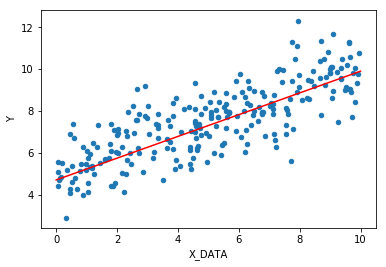

In [61]:
df.sample(n = 250).plot(kind='scatter',x='X_DATA',y='Y')
plt.plot(x_data , y_hat , 'red')

# TensorFlow Estimator Api

## Types

### tf.estimator.LinearClassifier: Constructs Linear Classification Model
### tf.estimator.LinearRegressor: Constructs Linear Regression Model
### tf.estimator.DNNClassifier: Constructs NN Classification Model
### tf.estimator.DNNRegressor: Constructs NN Regression Model

In [62]:
feature_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [63]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpoyw_aq9t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5220494a20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [67]:
from sklearn.model_selection import train_test_split 

In [68]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.3 , random_state=101)

## Estimator Input

In [69]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [70]:
train_inp_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [71]:
test_inp_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [72]:
estimator.train(input_fn = input_func , steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpoyw_aq9t/model.ckpt.
INFO:tensorflow:loss = 525.1139, step = 1
INFO:tensorflow:global_step/sec: 281.758
INFO:tensorflow:loss = 29.74334, step = 101 (0.356 sec)
INFO:tensorflow:global_step/sec: 314.922
INFO:tensorflow:loss = 21.313519, step = 201 (0.320 sec)
INFO:tensorflow:global_step/sec: 205.07
INFO:tensorflow:loss = 14.039328, step = 301 (0.487 sec)
INFO:tensorflow:global_step/sec: 287.232
INFO:tensorflow:loss = 10.549027, step = 401 (0.350 sec)
INFO:te

In [73]:
train_metrics = estimator.evaluate(input_fn = train_inp_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-15-18:33:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoyw_aq9t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-15-18:33:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0950248, global_step = 1000, label/mean = 7.4934535, loss = 8.760199, prediction/mean = 7.394127
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [74]:

eval_metrics = estimator.evaluate(input_fn = test_inp_func , steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-15-18:34:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoyw_aq9t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-15-18:34:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0842377, global_step = 1000, label/mean = 7.472508, loss = 8.673902, prediction/mean = 7.3726177
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [75]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0950248, 'label/mean': 7.4934535, 'loss': 8.760199, 'prediction/mean': 7.394127, 'global_step': 1000}


In [76]:
print('Tesing Data Metrics')
print(eval_metrics)

Tesing Data Metrics
{'average_loss': 1.0842377, 'label/mean': 7.472508, 'loss': 8.673902, 'prediction/mean': 7.3726177, 'global_step': 1000}


In [77]:
new_data = np.linspace(0,10,10)

In [78]:
inp_new = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [80]:
list(estimator.predict(input_fn=inp_new))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoyw_aq9t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4169], dtype=float32)},
 {'predictions': array([5.0782084], dtype=float32)},
 {'predictions': array([5.739517], dtype=float32)},
 {'predictions': array([6.4008255], dtype=float32)},
 {'predictions': array([7.062134], dtype=float32)},
 {'predictions': array([7.723442], dtype=float32)},
 {'predictions': array([8.38475], dtype=float32)},
 {'predictions': array([9.046059], dtype=float32)},
 {'predictions': array([9.707367], dtype=float32)},
 {'predictions': array([10.368675], dtype=float32)}]

In [81]:
pred = []

for pr in estimator.predict(input_fn=inp_new):
    pred.append(pr['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoyw_aq9t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [82]:
pred

[array([4.4169], dtype=float32),
 array([5.0782084], dtype=float32),
 array([5.739517], dtype=float32),
 array([6.4008255], dtype=float32),
 array([7.062134], dtype=float32),
 array([7.723442], dtype=float32),
 array([8.38475], dtype=float32),
 array([9.046059], dtype=float32),
 array([9.707367], dtype=float32),
 array([10.368675], dtype=float32)]

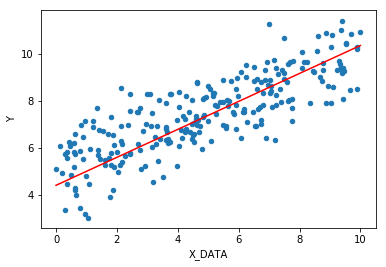

In [86]:
df.sample(n=250).plot(kind='scatter',x='X_DATA',y='Y')
plt.plot(new_data , pred , 'r')